In [4]:
import yaml
import pickle
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib as mpl
from astropy import constants, units
from mpl_toolkits.axes_grid1 import make_axes_locatable


from scripts import *

plt.rcParams['font.size'] = 16
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'
path = '/Users/arcticfox/Documents/disks'

In [2]:
def open_pickles(path):
    with open(os.path.join(path,'diskdata.pkl'), 'rb') as infile:
              diskinp = pickle.load(infile)
              ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze = diskinp
    return ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze

In [5]:
def plot_contour(data, cmap, ticks, ax, label, index=5, contourcolor=['k'], 
                 skipticks=0, logNorm=False, xlim=None, ylim=None):
    
    cmap = mpl.cm.get_cmap(cmap)
    cmap.set_under('w')
    cmap.set_over(cmap(1.0))
    
    if logNorm == False:
        im = ax.pcolormesh(data[-2], data[-1], data[index], cmap=cmap,
                           vmin=np.nanmin(ticks), vmax=np.nanmax(ticks))#,
                       #norm=mpl.colors.LogNorm(vmin=np.nanmin(ticks), vmax=np.nanmax(ticks)))
    else:
        im = ax.pcolormesh(data[-2], data[-1], data[index], cmap=cmap,
                           norm=mpl.colors.LogNorm(vmin=np.nanmin(ticks), 
                                                   vmax=np.nanmax(ticks)))
    ax.contour(data[-2], data[-1], data[index], ticks, colors=contourcolor)
    div = make_axes_locatable(ax)
    cax = div.append_axes('top', size='6%', pad=0.1)
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=ticks[skipticks:])
    cbar.set_label(label, fontsize=16)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize = 14)
    
    ax.set_xlabel('R [AU]')
    
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    
    ax.set_rasterized(True)
    
    return

## RADMC model call

In [ ]:
norm = setup(PATH=path, models=['bigdisk'], 
             uv=True, run=True, ndust=2,
             disk_params={'r_in':0.1, 'r_out':50.0, 'r_peb':50.0, 'r_snow':0.},
             grid_params={'ntheta':90, 
                          'nr':110, 
                          'n_in':0.05},
             star_params={'L_uv_star':6*10**2},
             disk_type='herbig', nphot=10**8)
            ## nr = 100; ntheta=96

1.35
bigdisk
saved star spectrum
0.1 50.0
Saved radmc setup files in /Users/arcticfox/Documents/disks/models/bigdisk


1.35
bigdisk100
plotted bigdisk100 summary figure
plotted bigdisk100 summary figure


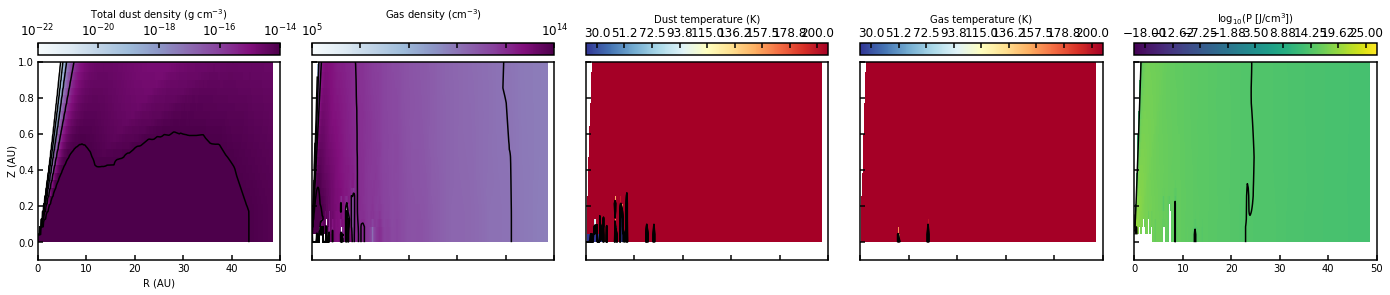

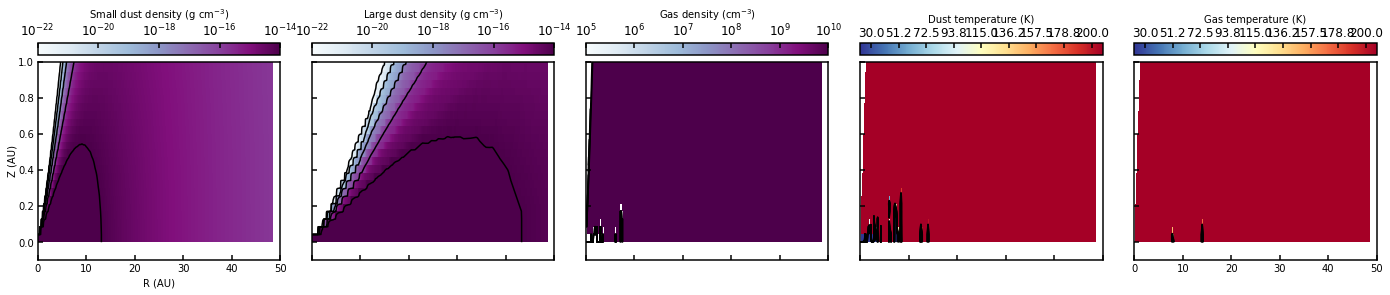

In [3]:
norm = setup(PATH=path, models=['bigdisk100'], 
             uv=True, run=False, ndust=2,
             disk_params={'r_in':0.1, 'r_out':50.0, 'r_peb':50.0, 'r_snow':0},
             grid_params={'ntheta':90, 
                          'nr':110, 
                          'n_in':0.05},
             star_params={'L_uv_star':6*10**4},
             disk_type='herbig', nphot=10**5.5)
            ## nr = 100; ntheta=96

In [6]:
bigdisk = open_pickles('/Users/arcticfox/Documents/disks/models/bigdisk')
bigdisk100 = open_pickles('/Users/arcticfox/Documents/disks/models/bigdisk100')       

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X a

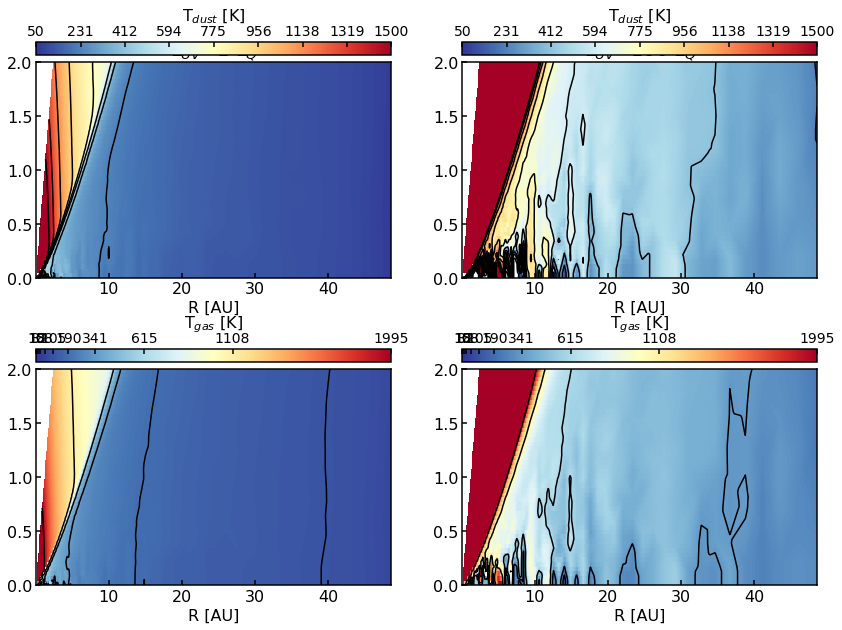

In [9]:
fig, ((ax1, ax2), (ax4, ax5)) = plt.subplots(ncols=2, nrows=2, figsize=(14,10))

tdust_ticks = np.linspace(50,1500,9)
tgas_ticks = np.logspace(1,3.3, 10)

ylim=[0,2]

plot_contour(bigdisk, ticks=tdust_ticks, cmap='RdYlBu_r', ax=ax1,
                   label='T$_{dust}$ [K]', index=3, ylim=ylim)
ax1.set_title('L$_{UV}$=1 L$_Q$')

plot_contour(bigdisk100, ticks=tdust_ticks, cmap='RdYlBu_r', ax=ax2,
                   label='T$_{dust}$ [K]', index=3, ylim=ylim)
ax2.set_title('L$_{UV}$=100 L$_Q$')

plot_contour(bigdisk, ticks=tgas_ticks, cmap='RdYlBu_r', ax=ax4,
                   label='T$_{gas}$ [K]', index=5, ylim=ylim)
plot_contour(bigdisk100, ticks=tgas_ticks, cmap='RdYlBu_r', ax=ax5,
                   label='T$_{gas}$ [K]', index=5, ylim=ylim)
plt.subplots_adjust(hspace=0.3)

In [ ]:
f = np.nanmedian((bigdisk100[3]+bigdisk100[2])/(bigdisk[3]+bigdisk[2]))
new_hh = f**0.5
print(new_hh)

In [ ]:
norm = setup(PATH=path, models=['bigdisk100_newhh'], 
             uv=True, run=True, ndust=2, hh=new_hh,
             disk_params={'r_in':0.1, 'r_out':50.0, 'r_peb':50.0, 'r_snow':0},
             grid_params={'ntheta':90, 
                          'nr':110, 
                          'n_in':0.05},
             star_params={'L_uv_star':6*10**4},
             disk_type='herbig', nphot=10**8)
            ## nr = 100; ntheta=96

In [ ]:
new_bigdisk100 = open_pickles('/Users/arcticfox/Documents/disks/models/bigdisk100_newhh/')       

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y h

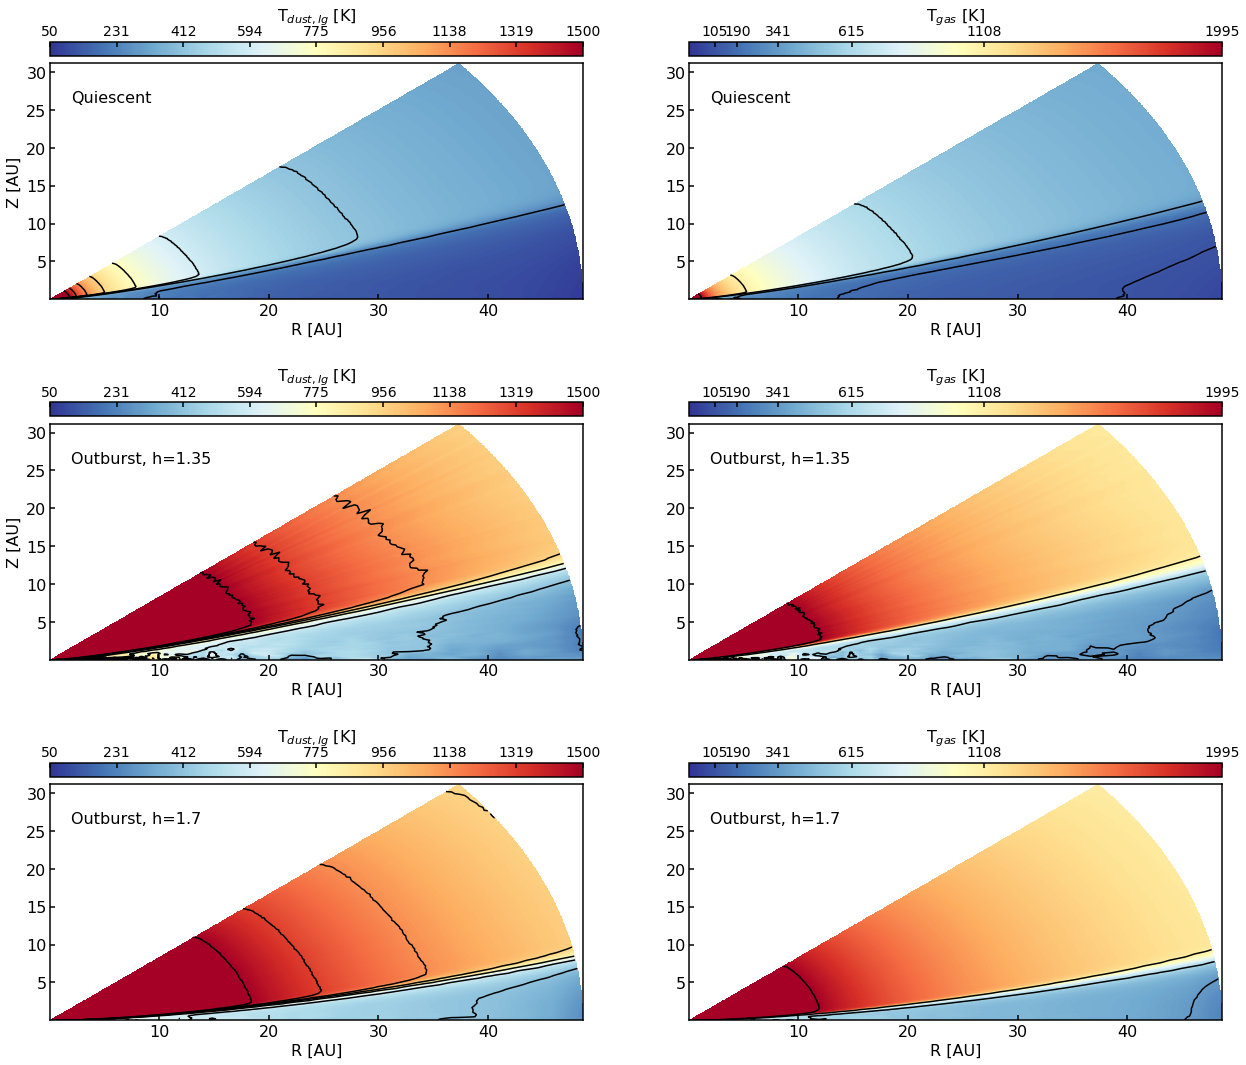

In [49]:
fig, ((ax4,ax5), (ax1,ax6), (ax2,ax3)) = plt.subplots(ncols=2, nrows=3, figsize=(21,18))
fig.set_facecolor('w')
plot_contour(bigdisk, 'RdYlBu_r', ticks=tdust_ticks, ax=ax4, label='T$_{dust, lg}$ [K]',
             index=3)
plot_contour(bigdisk100, 'RdYlBu_r', ticks=tdust_ticks, ax=ax1, label='T$_{dust, lg}$ [K]',
             index=3)
plot_contour(new_bigdisk100, 'RdYlBu_r', ticks=tdust_ticks, ax=ax2, label='T$_{dust, lg}$ [K]',
             index=3)

plot_contour(bigdisk, 'RdYlBu_r', ticks=tgas_ticks, ax=ax5, label='T$_{gas}$ [K]', skipticks=4)
plot_contour(bigdisk100, 'RdYlBu_r', ticks=tgas_ticks, ax=ax6, label='T$_{gas}$ [K]', skipticks=4)
plot_contour(new_bigdisk100, 'RdYlBu_r', ticks=tgas_ticks, ax=ax3, label='T$_{gas}$ [K]', skipticks=4)

ax1.set_ylabel('Z [AU]')
ax4.set_ylabel('Z [AU]')
plt.subplots_adjust(hspace=0.4)

labels = ['Quiescent', 'Outburst, h=1.35', 'Outburst, h={}'.format(np.round(new_hh,2))]
ax_sets = [[ax4, ax5], [ax1,ax6], [ax2,ax3]]
for i in range(len(labels)):
    ax_sets[i][0].text(s=labels[i], x=2, y=26, fontsize=16)
    ax_sets[i][1].text(s=labels[i], x=2, y=26, fontsize=16)
plt.savefig('/Users/arcticfox/Documents/GitHub/disks_and_outbursts/figures/comparison.png', rasterize=True, bbox_inches='tight', dpi=300)

### output order = ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the cor

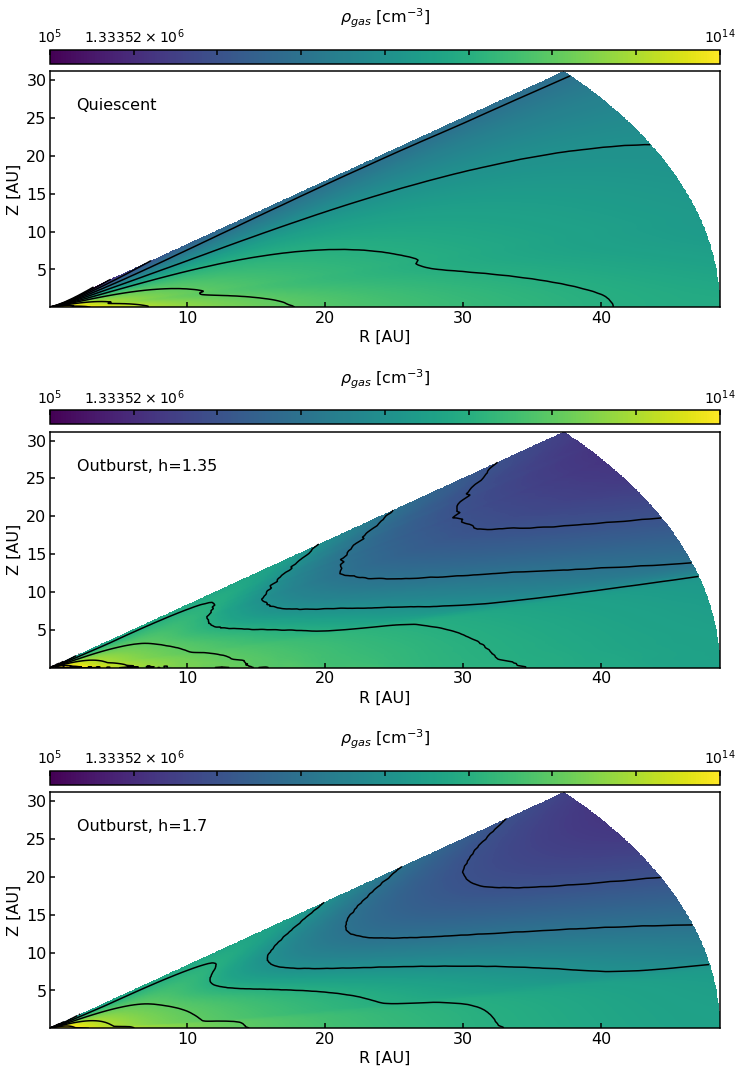

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,18))
fig.set_facecolor('w')

dgas_ticks = np.logspace(5,14,9)

plot_contour(bigdisk, 'viridis', ticks=dgas_ticks, ax=ax1, label=r'$\rho_{gas}$ [cm$^{-3}$]',
             index=4, logNorm=True)
plot_contour(bigdisk100, 'viridis', ticks=dgas_ticks, ax=ax2, label=r'$\rho_{gas}$ [cm$^{-3}$]',
             index=4, logNorm=True)
plot_contour(new_bigdisk100, 'viridis', ticks=dgas_ticks, ax=ax3, 
             label=r'$\rho_{gas}$ [cm$^{-3}$]',
             index=4, logNorm=True)

ax1.set_ylabel('Z [AU]')
ax2.set_ylabel('Z [AU]')
ax3.set_ylabel('Z [AU]')
plt.subplots_adjust(hspace=0.4)

labels = ['Quiescent', 'Outburst, h=1.35', 'Outburst, h={}'.format(np.round(new_hh,2))]
ax_sets = [ax1, ax2, ax3]
for i in range(len(labels)):
    ax_sets[i].text(s=labels[i], x=2, y=26, fontsize=16)
plt.savefig('/Users/arcticfox/Documents/GitHub/disks_and_outbursts/figures/comparison_density.png', 
            rasterize=True, bbox_inches='tight', dpi=300)